# Prepare Dataset for Model Training and Evaluating

# ADA monthly data with age and gender labels


## Schema

- `ifa` : unique identifier
- `label` : demographic label
- `bundle_vec` : vector of app bundles
- `persona_segment_vec` : vector of app segments
- `persona_L1_vec` : vector of app segment L1
- `persona_L2_vec` : vector of app segment L2
- `persona_L3_vec` : vector of app segment L3
- `device_vendor_vec` : vector of device vendor
- `device_name_vec` : vector of device name
- `device_manufacturer_vec` : vector of device manufecturers
- `device_model_vec` : vector of device model
- `device_year_of_release_vec` : vector of device year of release
- `dev_platform_vec` : vector of device platform
- `major_os_vec` : vector of major os
- `features` : collection of all features
- `indexed_label` : numeric indexed label
- `age_label` : age group label
- `Ratio` : ratio for balance the dataset
- `data_ratio` : ratio for balance the dataset
- `classWeightCol` : class weightage calcualted base on survey

# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [ ]:
%store -r setup_dependencies_passed

In [ ]:
try:
    setup_dependencies_passed
except NameError:
    print('+++++++++++++++++++++++++++++++')
    print('[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.')
    print('+++++++++++++++++++++++++++++++')

In [ ]:
print(setup_dependencies_passed)

## import necessary libraries

In [2]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

## Download

Let's start by retrieving the training dataset.

In [8]:
country = "MY"
input_data_path = "s3://ada-dev/etl/ml/age/temp/train/{}/202003/".format(country)

In [9]:
!aws s3 ls $input_data_path

2020-10-15 10:55:15          0 _SUCCESS
2020-10-15 10:55:13     350864 part-00000-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
2020-10-15 10:55:13     997050 part-00076-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
2020-10-15 10:55:14    7393284 part-00116-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
2020-10-15 10:55:14    5226599 part-00139-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
2020-10-15 10:55:14    3867282 part-00145-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet


In [15]:
!aws s3 cp $input_data_path ./data/ --recursive --exclude "_SUCCESS"

download: s3://ada-dev/etl/ml/age/temp/train/MY/202003/part-00076-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet to data/part-00076-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
download: s3://ada-dev/etl/ml/age/temp/train/MY/202003/part-00000-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet to data/part-00000-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
download: s3://ada-dev/etl/ml/age/temp/train/MY/202003/part-00145-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet to data/part-00145-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
download: s3://ada-dev/etl/ml/age/temp/train/MY/202003/part-00139-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet to data/part-00139-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
download: s3://ada-dev/etl/ml/age/temp/train/MY/202003/part-00116-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet to data/part-00116-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet


In [46]:
import os
import csv
import pyarrow

file_list = os.listdir('./data/')
file_list_clean = filter(lambda x: x.endswith('.parquet'),file_list)

df_combine = None

for file_path in file_list_clean:
    df = pd.read_parquet(os.path.join('./data/',file_path))
    df_combine = pd.concat([df_combine,df])
    
print(df_combine.shape)

part-00139-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
(38966, 20)
part-00000-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
(0, 20)
part-00145-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
(27898, 20)
part-00116-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
(57632, 20)
part-00076-89aa1ac8-d3de-46e2-beec-bfcacecc9d0f-c000.snappy.parquet
(5024, 20)
(129520, 20)


In [47]:
df_combine.dtypes

ifa                            object
label                          object
bundle_vec                     object
persona_segment_vec            object
persona_L1_vec                 object
persona_L2_vec                 object
persona_L3_vec                 object
device_vendor_vec              object
device_name_vec                object
device_manufacturer_vec        object
device_model_vec               object
device_year_of_release_vec     object
dev_platform_vec               object
major_os_vec                   object
features                       object
indexed_label                 float64
age_label                      object
Ratio                         float64
data_ratio                    float64
classWeightCol                float64
dtype: object

In [49]:
df_combine.head(5)

,ifa,label,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,device_model_vec,device_year_of_release_vec,dev_platform_vec,major_os_vec,features,indexed_label,age_label,Ratio,data_ratio,classWeightCol
0,0060bc6a-d56e-46f2-9fde-ea74074e78bb,35-49,"{'type': 0, 'size': 7900, 'indices': [0, 1, 8,...","{'type': 0, 'size': 57, 'indices': [0, 1, 2, 3...","{'type': 0, 'size': 19, 'indices': [0, 1, 2, 3...","{'type': 0, 'size': 85, 'indices': [1, 2, 3, 4...","{'type': 0, 'size': 60, 'indices': [0, 4], 'va...","{'type': 0, 'size': 21, 'indices': [], 'values...","{'type': 0, 'size': 249, 'indices': [], 'value...","{'type': 0, 'size': 21, 'indices': [], 'values...","{'type': 0, 'size': 475, 'indices': [22], 'val...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 8903, 'indices': [0, 1, 8,...",1.0,35-49,0.320378,0.300849,1.064912
1,01b8bb63-8067-49dc-a224-05e8381beb32,35-49,"{'type': 0, 'size': 7900, 'indices': [1, 15, 1...","{'type': 0, 'size': 57, 'indices': [1, 3, 8, 1...","{'type': 0, 'size': 19, 'indices': [0, 1, 4], ...","{'type': 0, 'size': 85, 'indices': [1, 2, 7], ...","{'type': 0, 'size': 60, 'indices': [0], 'value...","{'type': 0, 'size': 21, 'indices': [2], 'value...","{'type': 0, 'size': 249, 'indices': [53], 'val...","{'type': 0, 'size': 21, 'indices': [2], 'value...","{'type': 0, 'size': 475, 'indices': [76], 'val...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 8903, 'indices': [1, 15, 1...",1.0,35-49,0.320378,0.300849,1.064912
2,026bdb38-c55b-4d76-b30c-3c3df48dc3ef,35-49,"{'type': 0, 'size': 7900, 'indices': [8, 31, 5...","{'type': 0, 'size': 57, 'indices': [2, 4, 7, 8...","{'type': 0, 'size': 19, 'indices': [2, 3, 5, 8...","{'type': 0, 'size': 85, 'indices': [3, 9, 11, ...","{'type': 0, 'size': 60, 'indices': [5], 'value...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 249, 'indices': [0], 'valu...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 475, 'indices': [144], 'va...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 'size': 8903, 'indices': [8, 31, 5...",1.0,35-49,0.320378,0.300849,1.064912
3,0349a5c4-bef1-4010-b243-bb45905aa94d,35-49,"{'type': 0, 'size': 7900, 'indices': [27, 28, ...","{'type': 0, 'size': 57, 'indices': [8, 9, 11, ...","{'type': 0, 'size': 19, 'indices': [5], 'value...","{'type': 0, 'size': 85, 'indices': [34], 'valu...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 21, 'indices': [], 'values...","{'type': 0, 'size': 249, 'indices': [], 'value...","{'type': 0, 'size': 21, 'indices': [], 'values...","{'type': 0, 'size': 475, 'indices': [86], 'val...","{'type': 0, 'size': 7, 'indices': [], 'values'...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 8903, 'indices': [27, 28, ...",1.0,35-49,0.320378,0.300849,1.064912
4,03a0458a-d00e-4f70-b563-643e56be62d5,35-49,"{'type': 0, 'size': 7900, 'indices': [1, 89, 9...","{'type': 0, 'size': 57, 'indices': [0, 3, 8, 1...","{'type': 0, 'size': 19, 'indices': [0, 8, 9], ...","{'type': 0, 'size': 85, 'indices': [1, 5, 8, 9...","{'type': 0, 'size': 60, 'indices': [3, 17], 'v...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 249, 'indices': [0], 'valu...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 475, 'indices': [34], 'val...","{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 's

In [69]:
df_combine.groupby(["indexed_label","age_label"]).size()

indexed_label  age_label
0.0            25-34        57632
1.0            35-49        38966
2.0            18-24        27898
3.0            50+           5024
dtype: int64

Text(0, 0.5, 'Count')

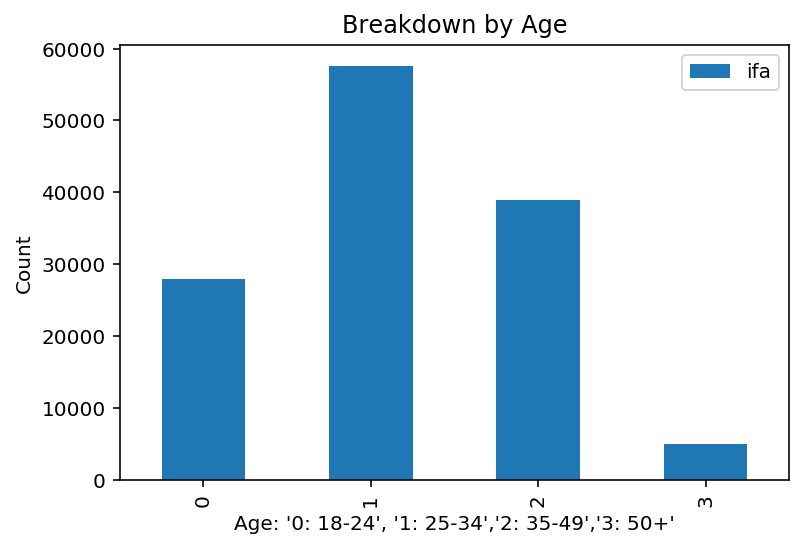

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# convert string label to numeric labels
label_map = {'18-24':0,'25-34':1,'35-49':2,'50+':3}
df_combine['label_int'] = df_combine['label'].map(label_map)

df_combine[['ifa', 'label_int']].groupby('label_int').count().plot(kind='bar', title='Breakdown by Age')
plt.xlabel("Age: '0: 18-24', '1: 25-34','2: 35-49','3: 50+'")
plt.ylabel('Count')

# Balance the Dataset

In [85]:
from sklearn.utils import resample

age_grup_0_df = df_combine.query('label_int == 0')
age_grup_1_df = df_combine.query('label_int == 1')
age_grup_2_df = df_combine.query('label_int == 2')
age_grup_3_df = df_combine.query('label_int == 3')

In [86]:
# Check which sentiment has the least number of samples
minority_count = min(age_grup_0_df.shape[0], 
                     age_grup_1_df.shape[0],
                     age_grup_2_df.shape[0],
                     age_grup_3_df.shape[0]
                    ) 

age_grup_0_df = resample(age_grup_0_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

age_grup_1_df = resample(age_grup_1_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

age_grup_2_df = resample(age_grup_2_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)

age_grup_3_df = resample(age_grup_3_df,
                        replace = False,
                        n_samples = minority_count,
                        random_state = 27)


df_balanced = pd.concat([age_grup_0_df, age_grup_1_df,age_grup_2_df, age_grup_3_df])
df_balanced = df_balanced.reset_index(drop=True)

df_balanced.shape

(20096, 21)

Text(0, 0.5, 'Count')

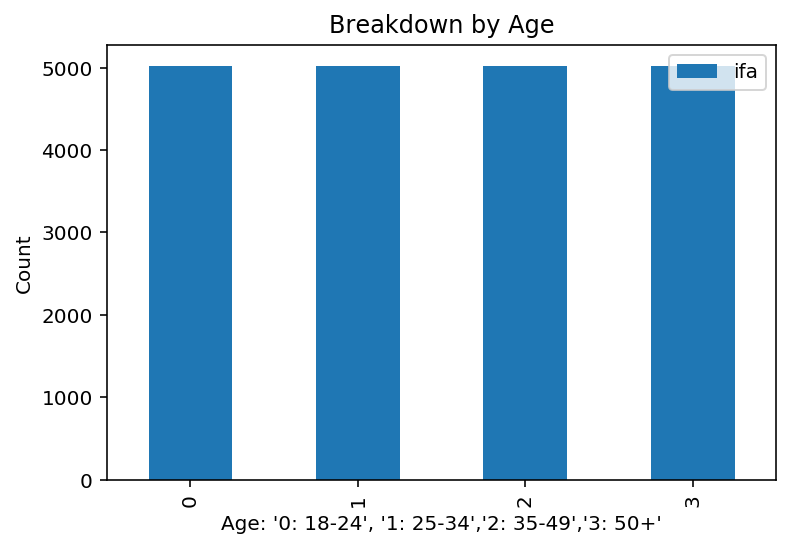

In [87]:
df_balanced[['ifa', 'label_int']].groupby('label_int').count().plot(kind='bar', title='Breakdown by Age')
plt.xlabel("Age: '0: 18-24', '1: 25-34','2: 35-49','3: 50+'")
plt.ylabel('Count')

In [88]:
df_balanced.head(5)

,ifa,label,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,...,device_year_of_release_vec,dev_platform_vec,major_os_vec,features,indexed_label,age_label,Ratio,data_ratio,classWeightCol,label_int
0,e7a5094e-4267-45e1-8eeb-086b766f4d5b,18-24,"{'type': 0, 'size': 7900, 'indices': [0, 7, 10...","{'type': 0, 'size': 57, 'indices': [0, 1, 5, 9...","{'type': 0, 'size': 19, 'indices': [0, 1, 5, 1...","{'type': 0, 'size': 85, 'indices': [0, 1, 2, 5...","{'type': 0, 'size': 60, 'indices': [0, 7], 'va...","{'type': 0, 'size': 21, 'indices': [4], 'value...","{'type': 0, 'size': 249, 'indices': [18], 'val...","{'type': 0, 'size': 21, 'indices': [4], 'value...",...,"{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 8903, 'indices': [0, 7, 10...",2.0,18-24,0.243697,0.215395,1.131396,0
1,ef28e112-0bb4-46dc-90ab-f752140bbf11,18-24,"{'type': 0, 'size': 7900, 'indices': [3, 6, 9,...","{'type': 0, 'size': 57, 'indices': [2, 4, 6, 9...","{'type': 0, 'size': 19, 'indices': [0, 2, 3], ...","{'type': 0, 'size': 85, 'indices': [0, 3, 4, 5...","{'type': 0, 'size': 60, 'indices': [1, 4], 'va...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 249, 'indices': [0], 'valu...","{'type': 0, 'size': 21, 'indices': [1], 'value...",...,"{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 'size': 8903, 'indices': [3, 6, 9,...",2.0,18-24,0.243697,0.215395,1.131396,0
2,5ff62cf2-ebb9-4cc2-ab49-b59660e39d61,18-24,"{'type': 0, 'size': 7900, 'indices': [3, 4, 9,...","{'type': 0, 'size': 57, 'indices': [2, 5, 6, 7...","{'type': 0, 'size': 19, 'indices': [0, 2], 'va...","{'type': 0, 'size': 85, 'indices': [0, 4], 'va...","{'type': 0, 'size': 60, 'indices': [1], 'value...","{'type': 0, 'size': 21, 'indices': [2], 'value...","{'type': 0, 'size': 249, 'indices': [4], 'valu...","{'type': 0, 'size': 21, 'indices': [2], 'value...",...,"{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 8903, 'indices': [3, 4, 9,...",2.0,18-24,0.243697,0.215395,1.131396,0
3,46958981-dd96-4676-8f6a-a83a42e157e3,18-24,"{'type': 0, 'size': 7900, 'indices': [0, 2, 5,...","{'type': 0, 'size': 57, 'indices': [0, 1, 2, 5...","{'type': 0, 'size': 19, 'indices': [0, 1, 2, 6...","{'type': 0, 'size': 85, 'indices': [1, 2, 6, 1...","{'type': 0, 'size': 60, 'indices': [0, 2, 13],...","{'type': 0, 'size': 21, 'indices': [3], 'value...","{'type': 0, 'size': 249, 'indices': [27], 'val...","{'type': 0, 'size': 21, 'indices': [3], 'value...",...,"{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 8903, 'indices': [0, 2, 5,...",2.0,18-24,0.243697,0.215395,1.131396,0
4,6b0f3126-7178-4784-aff8-3f9675eef0a3,18-24,"{'type': 0, 'size': 7900, 'indices': [1, 30, 7...","{'type': 0, 'size': 57, 'indices': [3, 13, 28,...","{'type': 0, 'size': 19, 'indices': [0], 'value...","{'type': 0, 'size': 85, 'indices': [1], 'value...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 21, 'indices': [2], 'value...","{'type': 0, 'size': 249, 'indices': [21], 'val...","{'type': 0, 'size': 21, 'indices': [2], 'value...",...,"{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [5], 'values...","{'type': 0, 'size': 8903, 'indices': [1, 30, 7...",2.0,18-24,0.243697,0.215395,1.131396,0


# Split the Data into Train, Validation, and Test Sets

In [89]:
from sklearn.model_selection import train_test_split

# Split all data into 90% train and 10% holdout
df_train, df_holdout = train_test_split(df_balanced, 
                                        test_size=0.10,
                                        stratify=df_balanced['label'])

# Split holdout data into 50% validation and 50% test
df_validation, df_test = train_test_split(df_holdout,
                                          test_size=0.50, 
                                          stratify=df_holdout['label'])


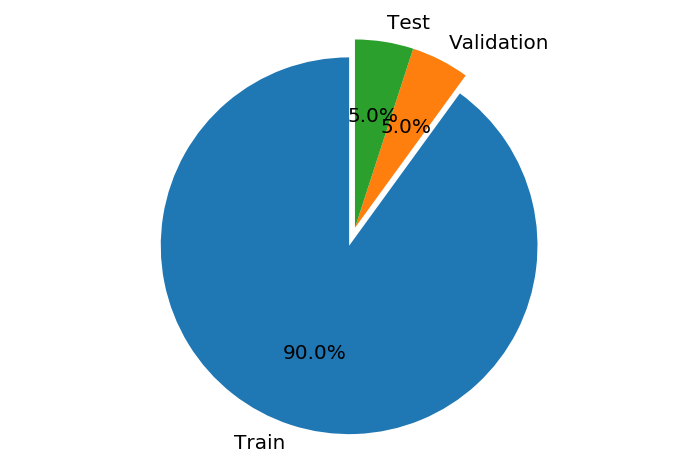

In [90]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Train', 'Validation', 'Test']
sizes = [len(df_train.index), len(df_validation.index), len(df_test.index)]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.show()

# Show 90% Train Data Split

In [91]:
df_train.shape

(18086, 21)

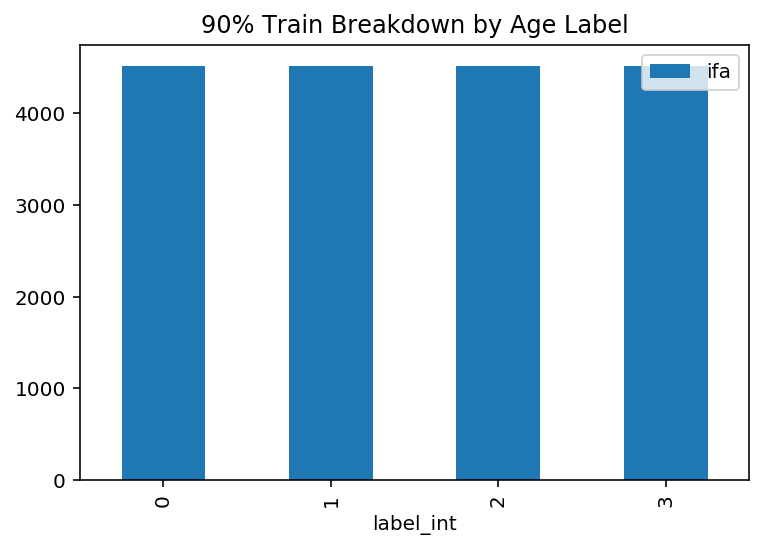

In [92]:
df_train[['ifa', 'label_int']].groupby('label_int').count().plot(kind='bar', title='90% Train Breakdown by Age Label')

# Show 5% Validation Data Split

In [32]:
df_validation.shape

(30, 16)

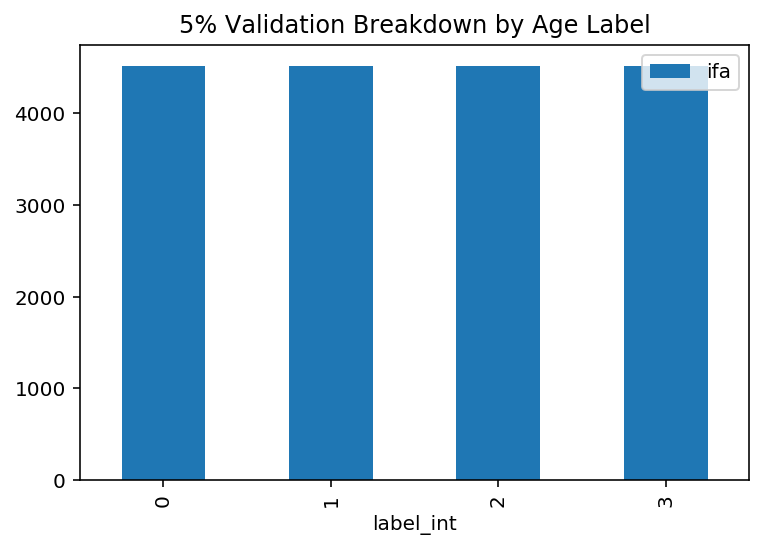

In [93]:
df_train[['ifa', 'label_int']].groupby('label_int').count().plot(kind='bar', title='5% Validation Breakdown by Age Label')

# Show 5% Test Data Split

In [35]:
df_test.shape

(30, 16)

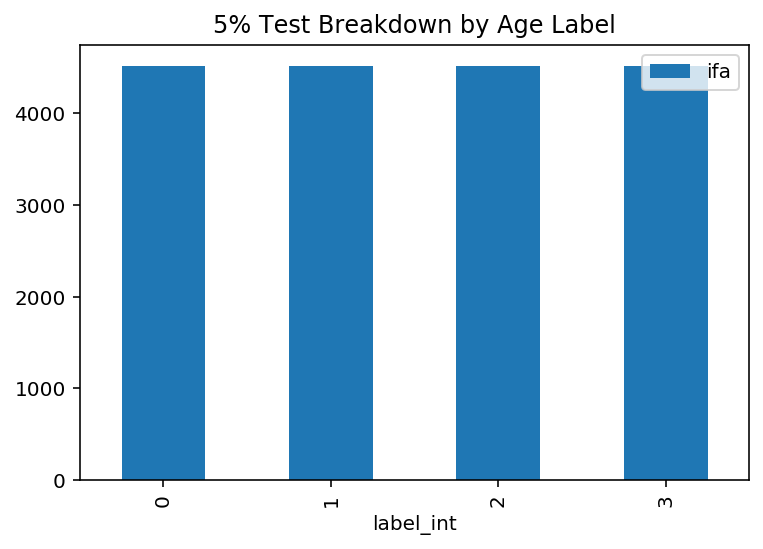

In [94]:
df_train[['ifa', 'label_int']].groupby('label_int').count().plot(kind='bar', title='5% Test Breakdown by Age Label')

# Select `label` and `features` for Training

In [95]:
df_train.dtypes

ifa                            object
label                          object
bundle_vec                     object
persona_segment_vec            object
persona_L1_vec                 object
persona_L2_vec                 object
persona_L3_vec                 object
device_vendor_vec              object
device_name_vec                object
device_manufacturer_vec        object
device_model_vec               object
device_year_of_release_vec     object
dev_platform_vec               object
major_os_vec                   object
features                       object
indexed_label                 float64
age_label                      object
Ratio                         float64
data_ratio                    float64
classWeightCol                float64
label_int                       int64
dtype: object

In [96]:
drop_column_list = ['classWeightCol','features','label','indexed_label','age_label','Ratio','data_ratio']
df_train = df_train.drop(drop_column_list,axis = 1)
df_train.shape

(18086, 14)

In [97]:
df_train.head(5)

,ifa,bundle_vec,persona_segment_vec,persona_L1_vec,persona_L2_vec,persona_L3_vec,device_vendor_vec,device_name_vec,device_manufacturer_vec,device_model_vec,device_year_of_release_vec,dev_platform_vec,major_os_vec,label_int
17914,0618c523-1889-4b20-82fc-246c78718689,"{'type': 0, 'size': 7900, 'indices': [2, 36, 1...","{'type': 0, 'size': 57, 'indices': [0, 4, 18, ...","{'type': 0, 'size': 19, 'indices': [7, 9, 12],...","{'type': 0, 'size': 85, 'indices': [8, 20, 38]...","{'type': 0, 'size': 60, 'indices': [8], 'value...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 249, 'indices': [0], 'valu...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 475, 'indices': [89], 'val...","{'type': 0, 'size': 7, 'indices': [3], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [2], 'values...",3
16340,15af96ba-3fe0-4833-a280-c19194a29d80,"{'type': 0, 'size': 7900, 'indices': [17, 37, ...","{'type': 0, 'size': 57, 'indices': [0, 3, 7], ...","{'type': 0, 'size': 19, 'indices': [0], 'value...","{'type': 0, 'size': 85, 'indices': [1], 'value...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 21, 'indices': [0], 'value...","{'type': 0, 'size': 249, 'indices': [2], 'valu...","{'type': 0, 'size': 21, 'indices': [0], 'value...","{'type': 0, 'size': 475, 'indices': [1], 'valu...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...",3
9188,2c4ede0c-32ef-4c69-964c-545bacc2fdef,"{'type': 0, 'size': 7900, 'indices': [11, 25, ...","{'type': 0, 'size': 57, 'indices': [0, 1, 19, ...","{'type': 0, 'size': 19, 'indices': [1, 7, 13],...","{'type': 0, 'size': 85, 'indices': [2, 27, 28]...","{'type': 0, 'size': 60, 'indices': [0], 'value...","{'type': 0, 'size': 21, 'indices': [4], 'value...","{'type': 0, 'size': 249, 'indices': [49], 'val...","{'type': 0, 'size': 21, 'indices': [4], 'value...","{'type': 0, 'size': 475, 'indices': [67], 'val...","{'type': 0, 'size': 7, 'indices': [1], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...",1
15988,80bdfeba-5cb0-414a-87a6-aac24451a20a,"{'type': 0, 'size': 7900, 'indices': [8, 22, 9...","{'type': 0, 'size': 57, 'indices': [0, 1, 4, 6...","{'type': 0, 'size': 19, 'indices': [0, 3, 7, 9...","{'type': 0, 'size': 85, 'indices': [3, 5, 8, 1...","{'type': 0, 'size': 60, 'indices': [4], 'value...","{'type': 0, 'size': 21, 'indices': [0], 'value...","{'type': 0, 'size': 249, 'indices': [3], 'valu...","{'type': 0, 'size': 21, 'indices': [0], 'value...","{'type': 0, 'size': 475, 'indices': [2], 'valu...","{'type': 0, 'size': 7, 'indices': [0], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...",3
6392,ad0a78ef-f66b-4da4-a2b2-495b07d1ebf3,"{'type': 0, 'size': 7900, 'indices': [2, 8, 12...","{'type': 0, 'size': 57, 'indices': [0, 4, 7, 2...","{'type': 0, 'size': 19, 'indices': [3, 13], 'v...","{'type': 0, 'size': 85, 'indices': [3, 28], 'v...","{'type': 0, 'size': 60, 'indices': [], 'values...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 249, 'indices': [0], 'valu...","{'type': 0, 'size': 21, 'indices': [1], 'value...","{'type': 0, 'size': 475, 'indices': [27], 'val...","{'type': 0, 'size': 7, 'indices': [2], 'values...","{'type': 0, 'size': 2, 'indices': [0], 'values...","{'type': 0, 'size': 7, 'indices': [0], 'values...",1


# Write a Train CSV with Header for Autopilot 

In [98]:
autopilot_train_path = './train_data.csv'
df_train.to_csv(autopilot_train_path, index=False, header=True)

# Upload Train Data to S3 for Autopilot

In [99]:
train_s3_prefix = 'xiaotian/ml/autopilot/data'
bucket = "ada-dev"
autopilot_train_s3_uri = sess.upload_data(path=autopilot_train_path,bucket = bucket, key_prefix=train_s3_prefix)
autopilot_train_s3_uri

's3://ada-dev/xiaotian/ml/autopilot/data/train_data.csv'

In [100]:
!aws s3 ls $autopilot_train_s3_uri

2020-11-14 13:45:05   22247352 train_data.csv


# Store Variables for Next Notebook(s)

In [101]:
autopilot_train_s3_uri

's3://ada-dev/xiaotian/ml/autopilot/data/train_data.csv'

In [102]:
%store autopilot_train_s3_uri

Stored 'autopilot_train_s3_uri' (str)


In [103]:
%store

Stored variables and their in-db values:
autopilot_train_s3_uri             -> 's3://ada-dev/xiaotian/ml/autopilot/data/train_dat


In [ ]:
%%javascript
Jupyter.notebook.save_checkpoint();
Jupyter.notebook.session.delete();